In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph
import networkx as nx
from pyvis.network import Network

# Load your image
image_path = 'overlapping_masks/000_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_01-Fish Eye Corrected_root_mask.tif'
image = imread(image_path)

# Convert to boolean (binary) image if necessary
binary_image = image if image.dtype == bool else image > 0

# Skeletonize the image
skeleton = skeletonize(binary_image)
branch = summarize(Skeleton(skeleton))
G = nx.from_pandas_edgelist(branch, source='node-id-src', target='node-id-dst', edge_attr='branch-distance')

net = Network(notebook=True)
net.from_nx(G)


net.show_buttons(filter_=['physics'])


# Enable hierarchical layout if needed
net.options.layout = {"hierarchical": True}


net.show("index.html")

In [5]:
from Personal_pipelines.Fedya_pipeline.backend import *

Segmentation Models: using `tf.keras` framework.


In [35]:
coords = roi_extraction_coords("/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/input_images/001_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_02-Fish Eye Corrected.png")
coords

[66, 2827, 753, 3514]

In [10]:
import matplotlib.pyplot as plt
import cv2
import glob

template = cv2.imread("seeding_template.tif", 0)
for path in glob.glob("/Users/work_uni/Downloads/T0/*.png.png"):
    image = cv2.imread(path,0)[:,:4112]
    bitwise_or = cv2.bitwise_or(image, template)
    path = path[path.rfind("/")+1:-4]
    print(f'/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/{path}_template.png')
    cv2.imwrite(f'/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/{path}_template.png', bitwise_or)

/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/_0000s_0009_43-1-ROOT1-2023-08-08_pvdCherry_OD0001_f6h1_02-Fish-Eye-Corrected.png_template.png
/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/_0000s_0003_43-1-ROOT1-2023-08-08_pvdCherry_OD0001_Col0_04-Fish-Eye-Corrected.png_template.png
/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/_0000s_0011_43-1-ROOT1-2023-08-08_pvdCherry_OD0001_f6h1_03-Fish-Eye-Corrected.png_template.png
/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/_0000s_0015_43-1-ROOT1-2023-08-08_pvdCherry_OD0001_f6h1_05-Fish-Eye-Corrected.png_template.png
/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/_0000s_0013_43-1-ROOT1-2023-08-08_pvdCherry_OD0001_f6h1_04-Fish-Eye-Corrected.png_template.png
/Users/work_uni/Documents/GitHub/AIxPlant_Science/overlapping_roots/check_pos/_0000s_0001_43-1-ROOT1-2023-08-08_pvdCherry_OD0001_Col0_0

In [49]:
image.shape

(3006, 4112)

In [50]:
template.shape

(3006, 4112)

In [7]:
import matplotlib.pyplot as plt
import cv2
import glob
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
import skimage
from skan.csr import skeleton_to_csgraph
import networkx as nx
from pyvis.network import Network

mask = cv2.imread("overlapping_masks/000_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_01-Fish Eye Corrected_root_mask.tif")

plant_skeleton = skimage.morphology.skeletonize(mask)
plant_branch = summarize(Skeleton(plant_skeleton))

branch_points = []

for i in range(len(plant_branch)):
    if plant_branch['branch-type'][i] > 1:
        coords = [plant_branch['image-coord-src-1'][i], plant_branch['image-coord-src-0'][i]]
        branch_points.append(coords)
    
for item in branch_points:
    if branch_points.count(item) == 2:
        mask = cv2.circle(mask, item, 5, (0, 255, 0), 5)

        
    # for j in range(len(branch)):
    #     print(branch['branch-type'][j])
# G = nx.from_pandas_edgelist(branch, source='node-id-src', target='node-id-dst', edge_attr='branch-distance')
# 
# # Find branching points
# branching_points = np.argwhere((cv2.cornerHarris(skeleton, 2, 3, 0.04) > 0.01) & (skeleton == 1))
# 
# # Create a graph
# G = nx.Graph()
# for y, x in np.argwhere(skeleton == 1):
#     G.add_node((x, y))
#     for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         if skeleton[y + dy, x + dx]:
#             G.add_edge((x, y), (x + dx, y + dy))
# 
# # Color branching points in green
# for point in branching_points:
#     y, x = point
#     print("done")
#     binary_image[x, y] = [0, 255, 0]  # RGB for green
# 
# # Convert array to image and save
# fig = plt.figure(figsize=(3.54,3.54), dpi=600)
# plt.imshow(binary_image, cmap='gray')


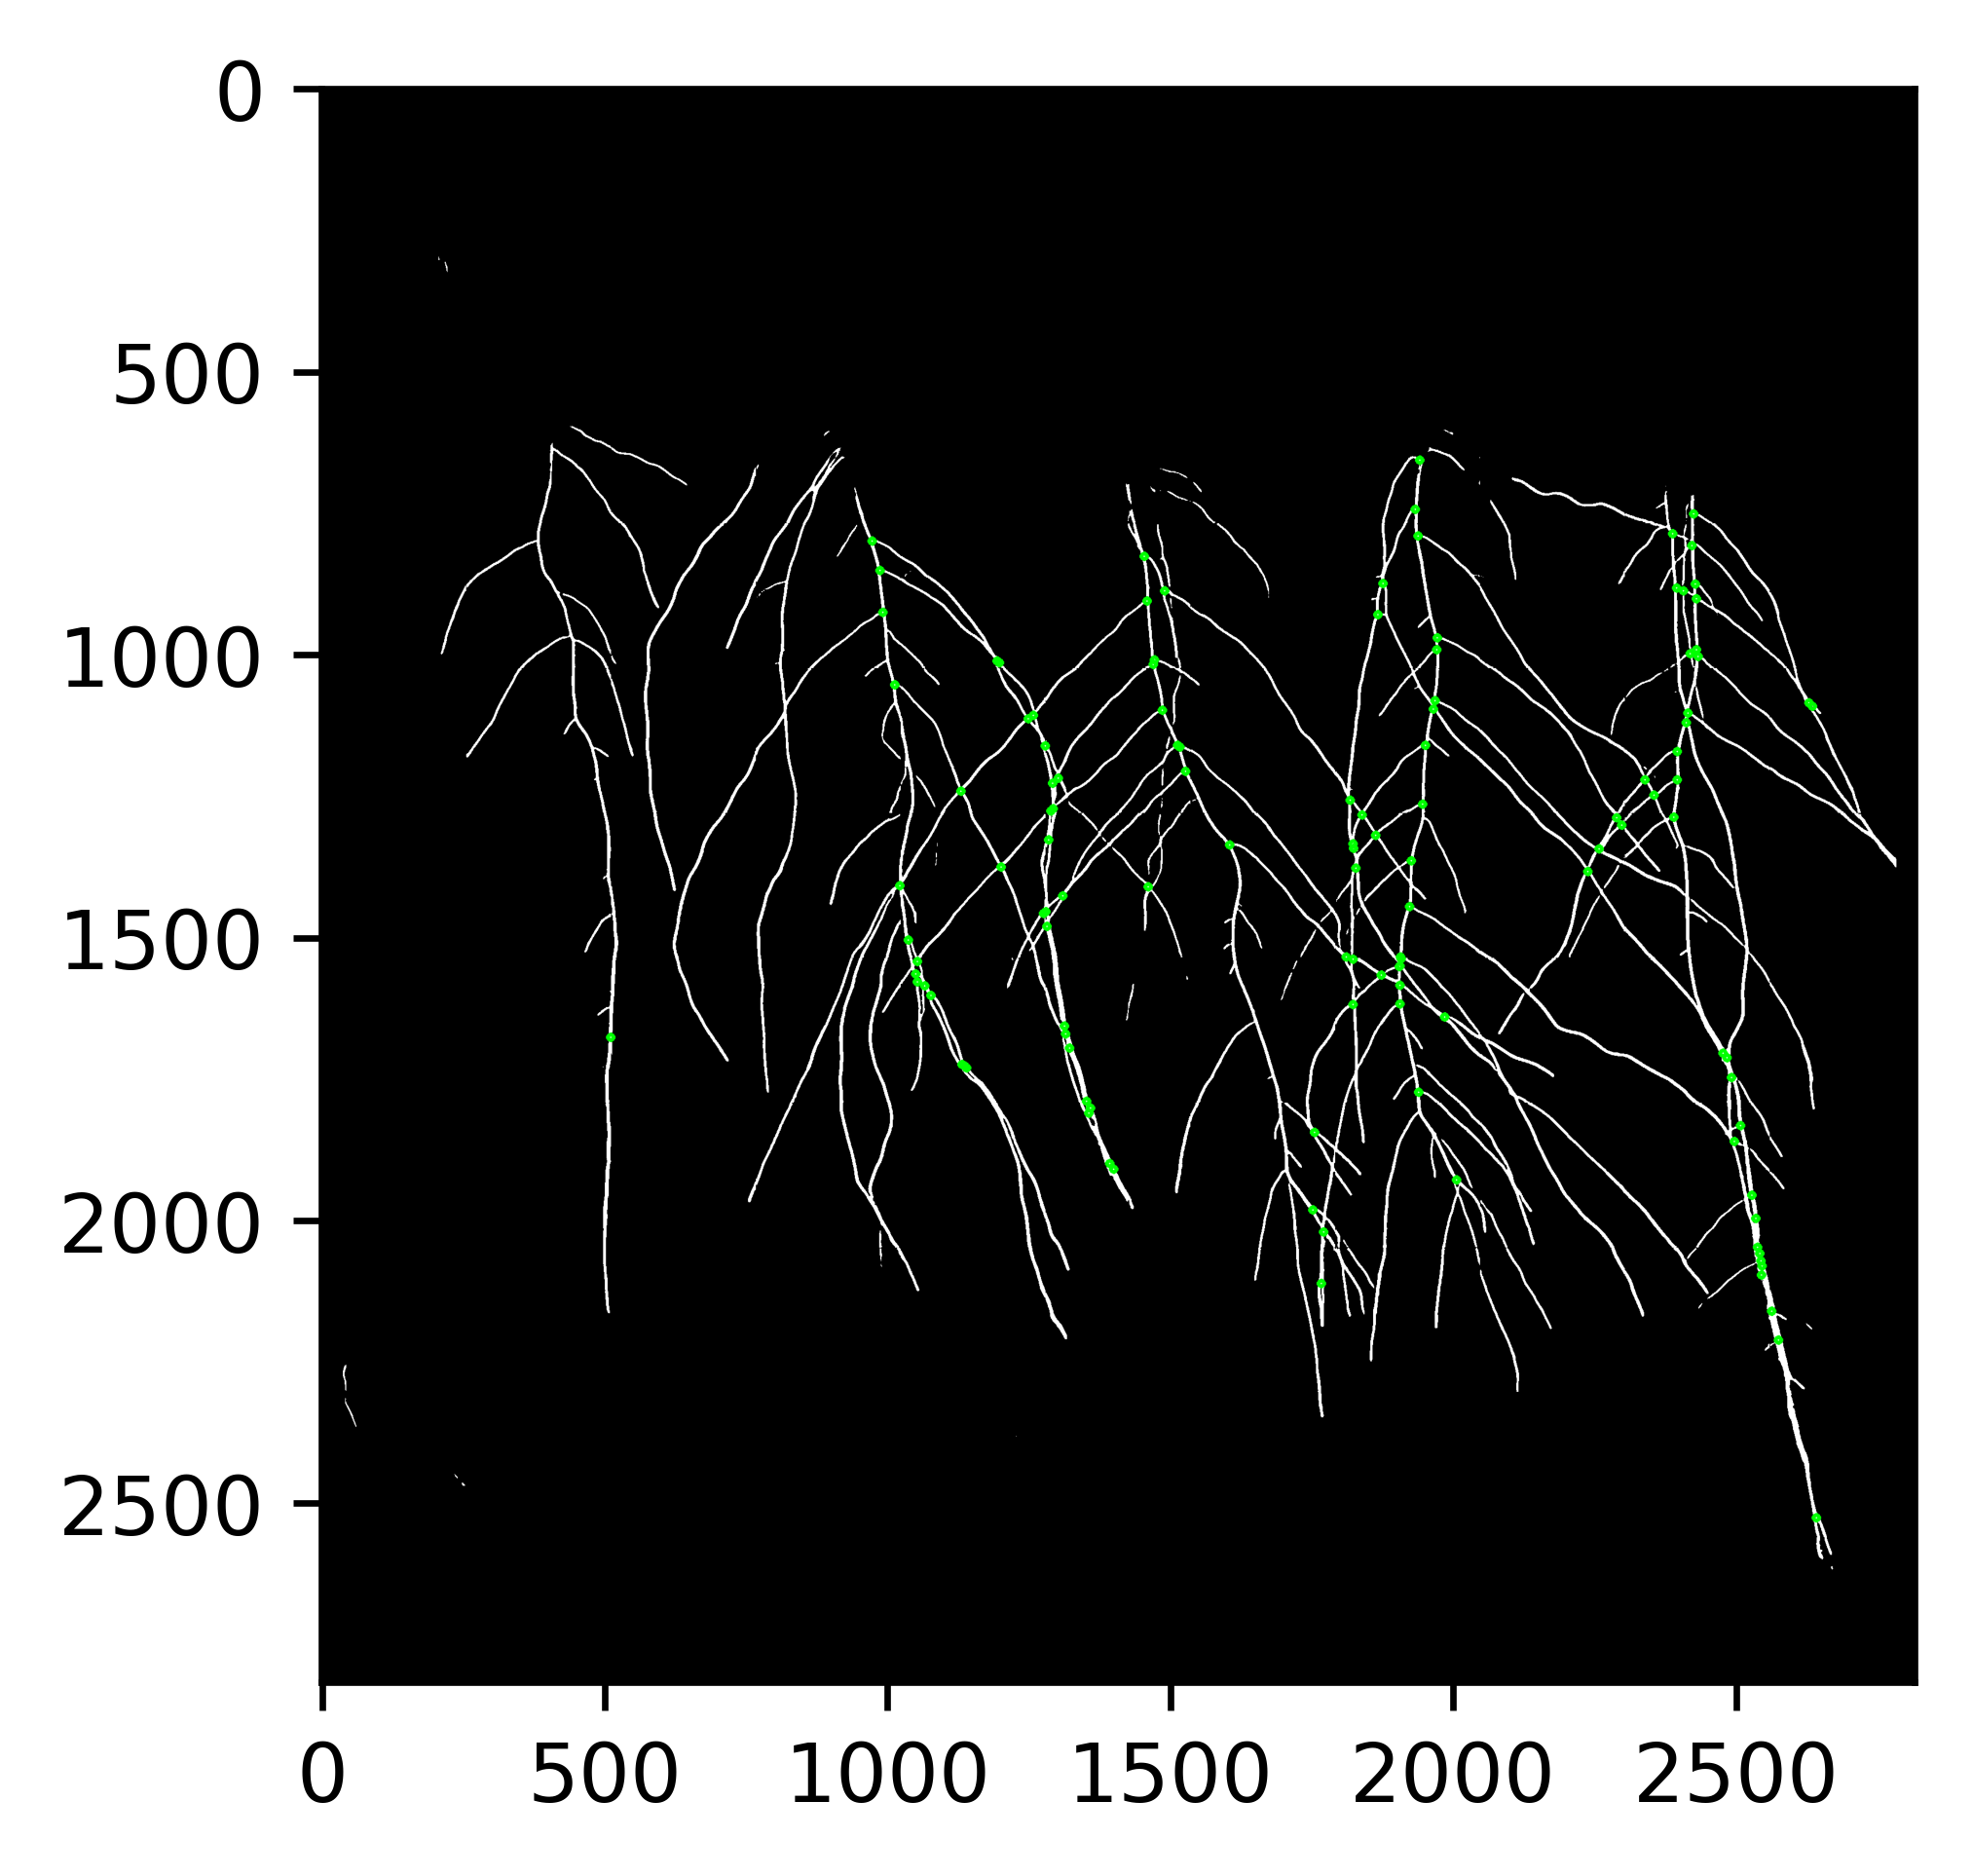

In [8]:
fig = plt.figure(figsize=(3.54,3.54), dpi=600)
plt.imshow(mask)

In [45]:
mask = cv2.imread("overlapping_masks/000_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_01-Fish Eye Corrected_predicted.tif", cv2.IMREAD_COLOR)
mask = (mask * 255).astype('uint8')
mask = skimage.morphology.dilation(mask)
mask = skimage.morphology.erosion(mask)
print(mask.shape)
plant_skeleton = skimage.morphology.skeletonize(mask)
plant_branch = summarize(Skeleton(plant_skeleton))

branch_points = []

for i in range(len(plant_branch)):
    if plant_branch['branch-type'][i] > 1:
        coords = [plant_branch['image-coord-src-1'][i], plant_branch['image-coord-src-0'][i]]
        branch_points.append(coords)
    
for item in branch_points:
    if branch_points.count(item) > 1:
        mask = cv2.circle(mask, item, 5, (0, 0, 0), -1)

(2816, 2816, 3)


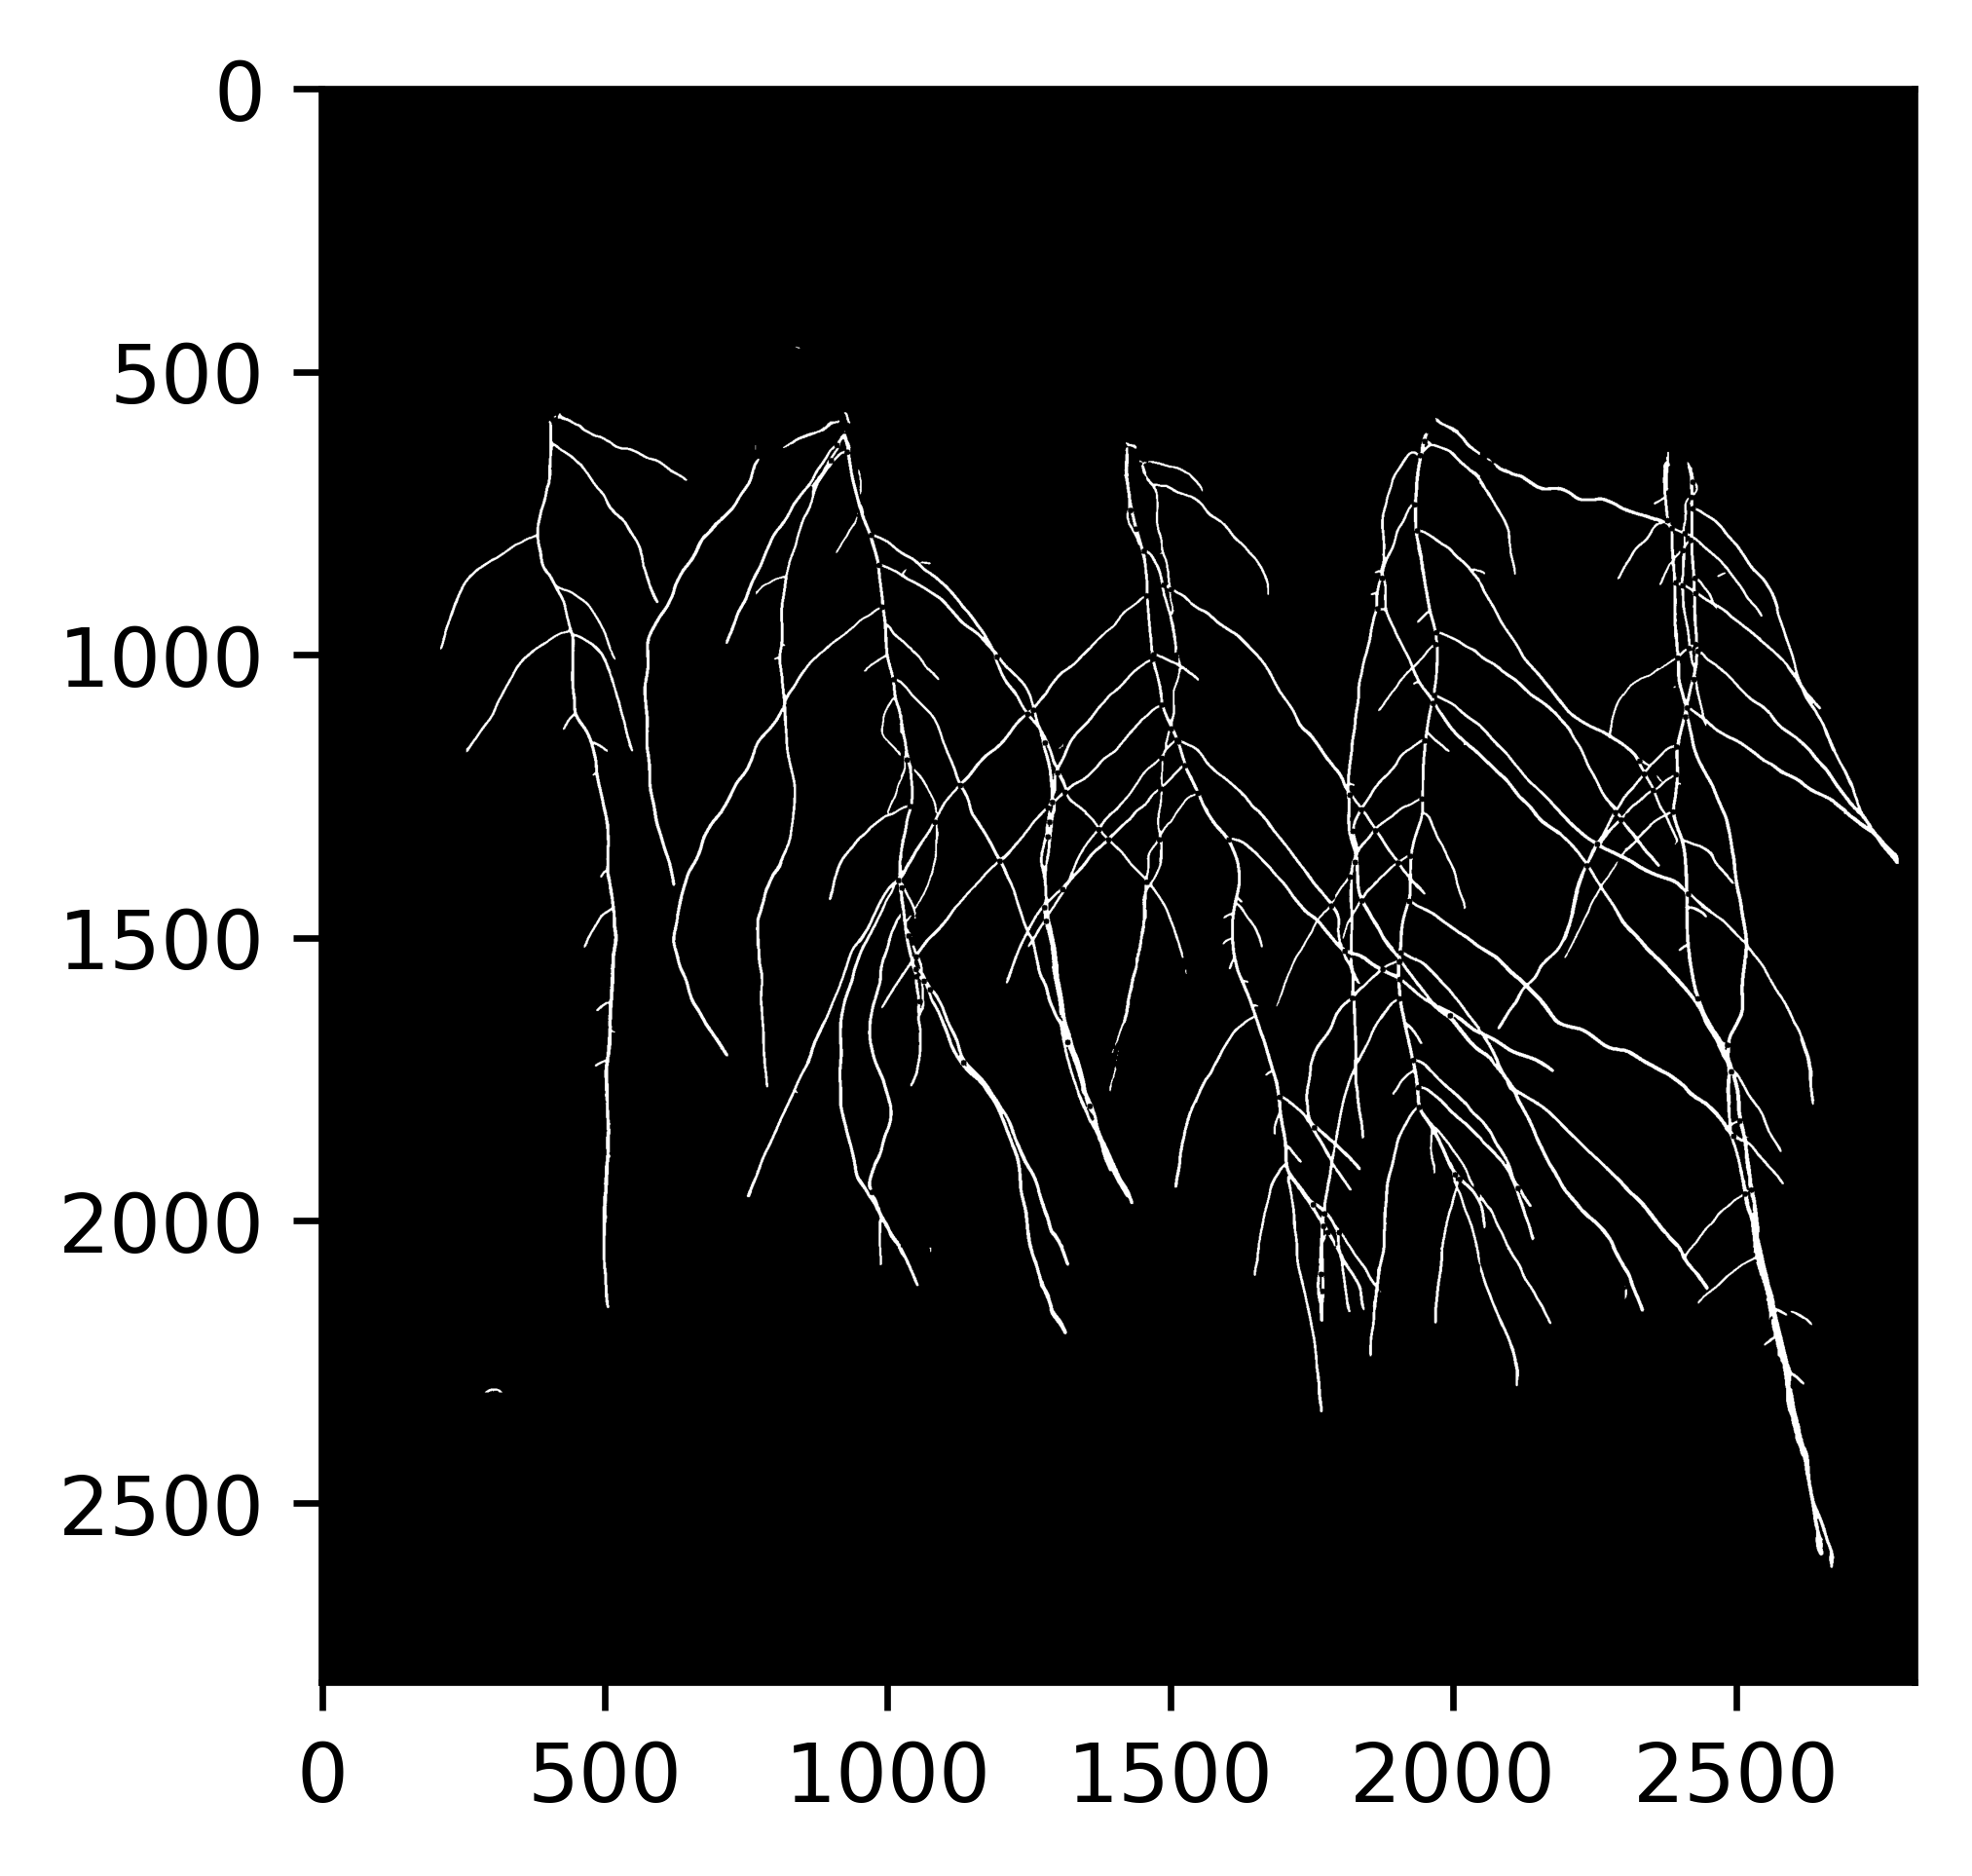

In [46]:
fig = plt.figure(figsize=(3.54,3.54), dpi=600)
plt.imshow(mask, cmap='grey')